#                                 Machine Learning - Diabetes Dataset

#### In this project we are going to create Machine Learning Model to predict if the patient is diabetic or not.

We will compare Logistic Regression model and Naive Bayes model and select the best model for production.

### About Dataset

#### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

#### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

#### Sources:

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases

(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231

(c) Date received: 9 May 1990

Number of Instances: 768
    
Number of Attributes: 8 plus class
    
For Each Attribute: (all numeric-valued)
    
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1)
- Missing Attribute Values: Yes
- Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")

### Importing Libraries, Data Cleaning and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sugar = pd.read_csv(r"‪D:\Harsh\ds_eda\diabetes.csv".lstrip("'\u202a"))

In [3]:
sugar.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
sugar.shape

(768, 9)

In [5]:
sugar.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
sugar.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
sugar.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
corr = sugar.corr()

<Axes: >

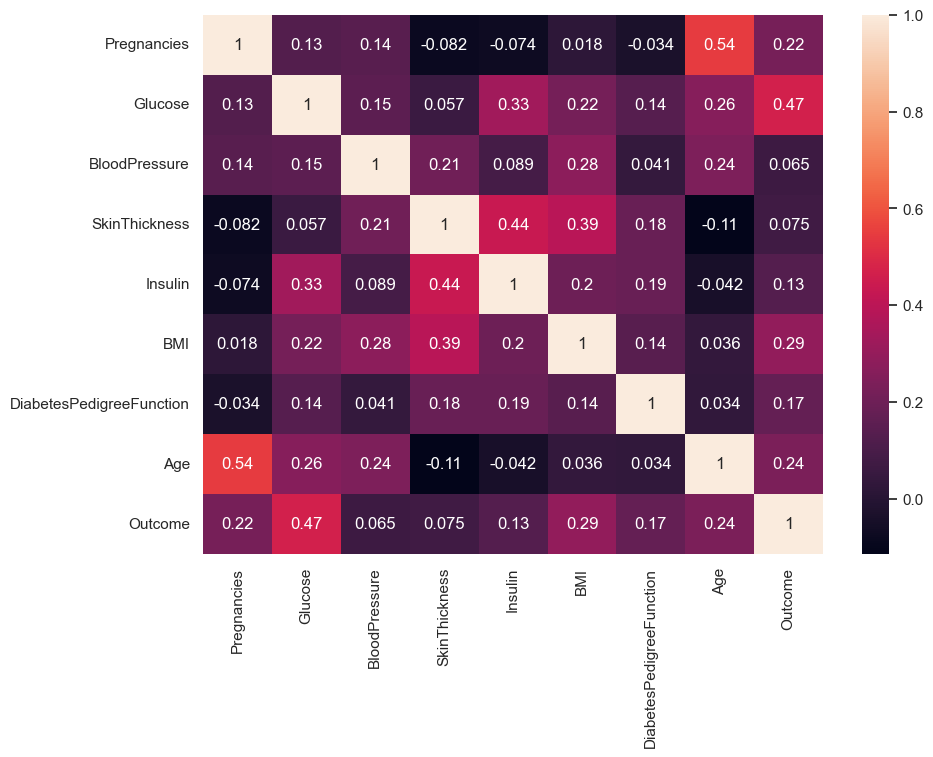

In [9]:
sns.set(rc={'figure.figsize' : (10,7)})
sns.heatmap(corr, annot = True)

<function matplotlib.pyplot.show(close=None, block=None)>

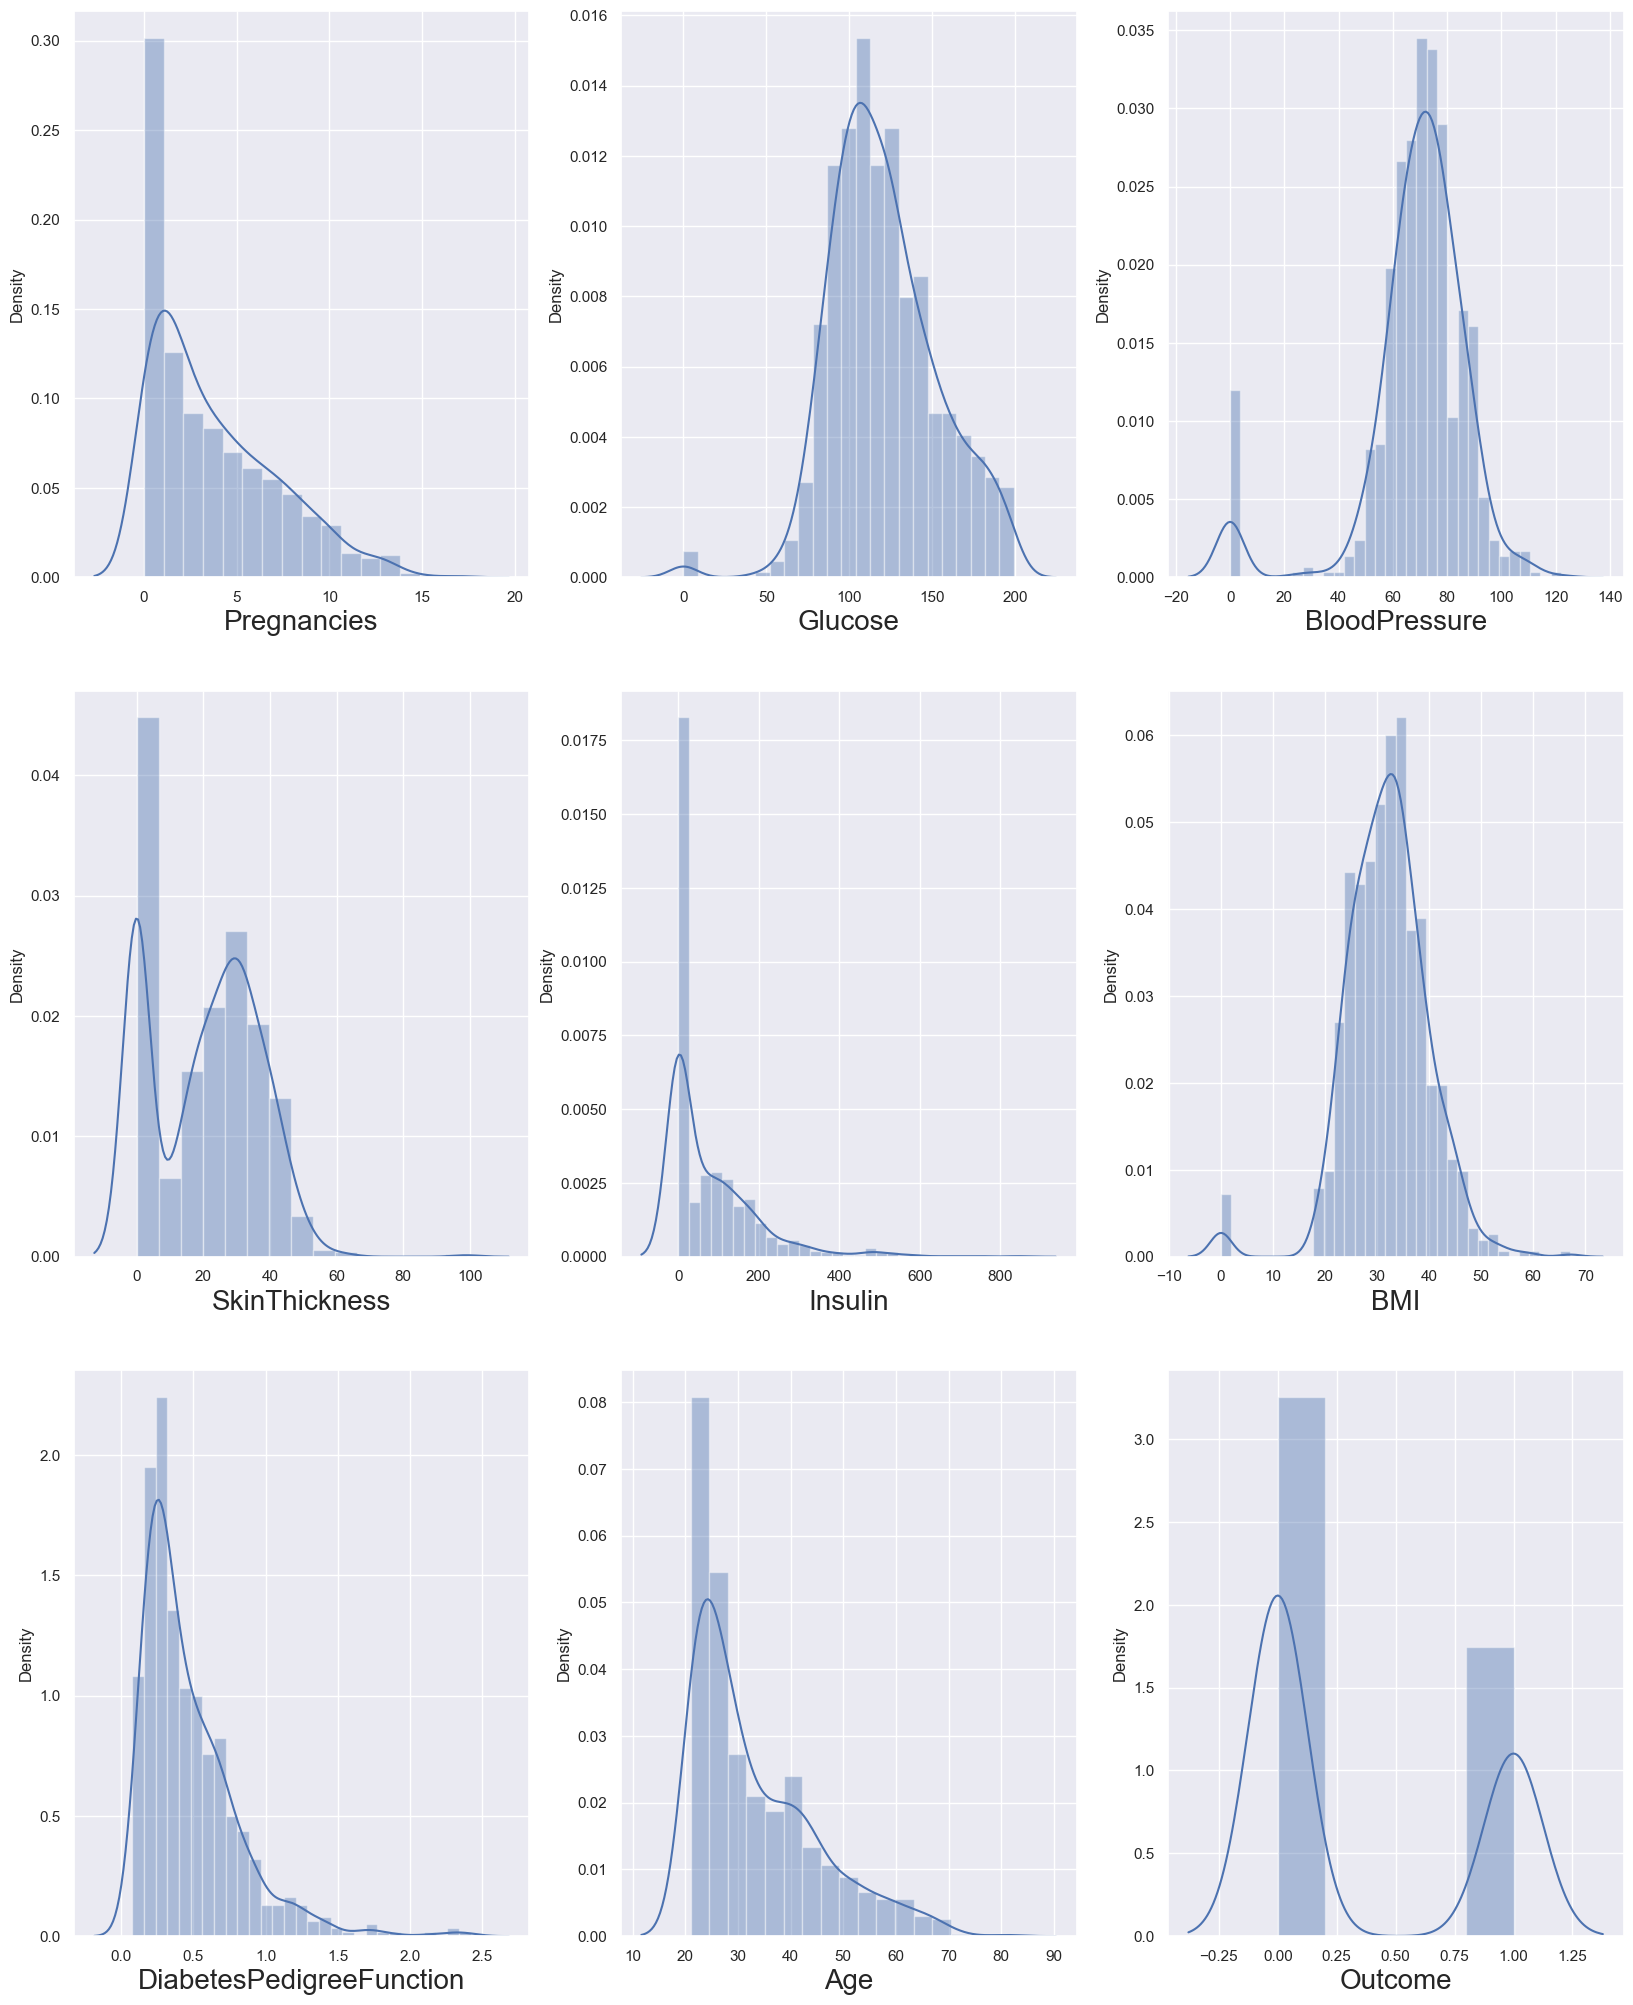

In [10]:
plt.figure(figsize=(20,25), facecolor='white')

plotnum = 1
for column in sugar:
    if plotnum<=9:
        ax = plt.subplot(3,3,plotnum)
        sns.distplot(sugar[column])
        plt.xlabel(column, fontsize = 20)
    plotnum +=1
plt.show

In [11]:
# Replacing zero Values with the mean of the column

In [12]:
sugar.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
sugar['Pregnancies'] = sugar['Pregnancies'].replace(0, sugar['Pregnancies'].mean())
sugar['Glucose'] = sugar['Glucose'].replace(0, sugar['Glucose'].mean())
sugar['BloodPressure'] = sugar['BloodPressure'].replace(0, sugar['BloodPressure'].mean())
sugar['SkinThickness'] = sugar['SkinThickness'].replace(0, sugar['SkinThickness'].mean())
sugar['Insulin'] = sugar['Insulin'].replace(0, sugar['Insulin'].mean())
sugar['BMI'] = sugar['BMI'].replace(0, sugar['BMI'].mean())
sugar['DiabetesPedigreeFunction'] = sugar['DiabetesPedigreeFunction'].replace(0, sugar['DiabetesPedigreeFunction'].mean())
sugar['Age'] = sugar['Age'].replace(0, sugar['Age'].mean())

In [14]:
sugar.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [15]:
X = sugar[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

In [16]:
y = sugar['Outcome']

# Outliars

<Axes: >

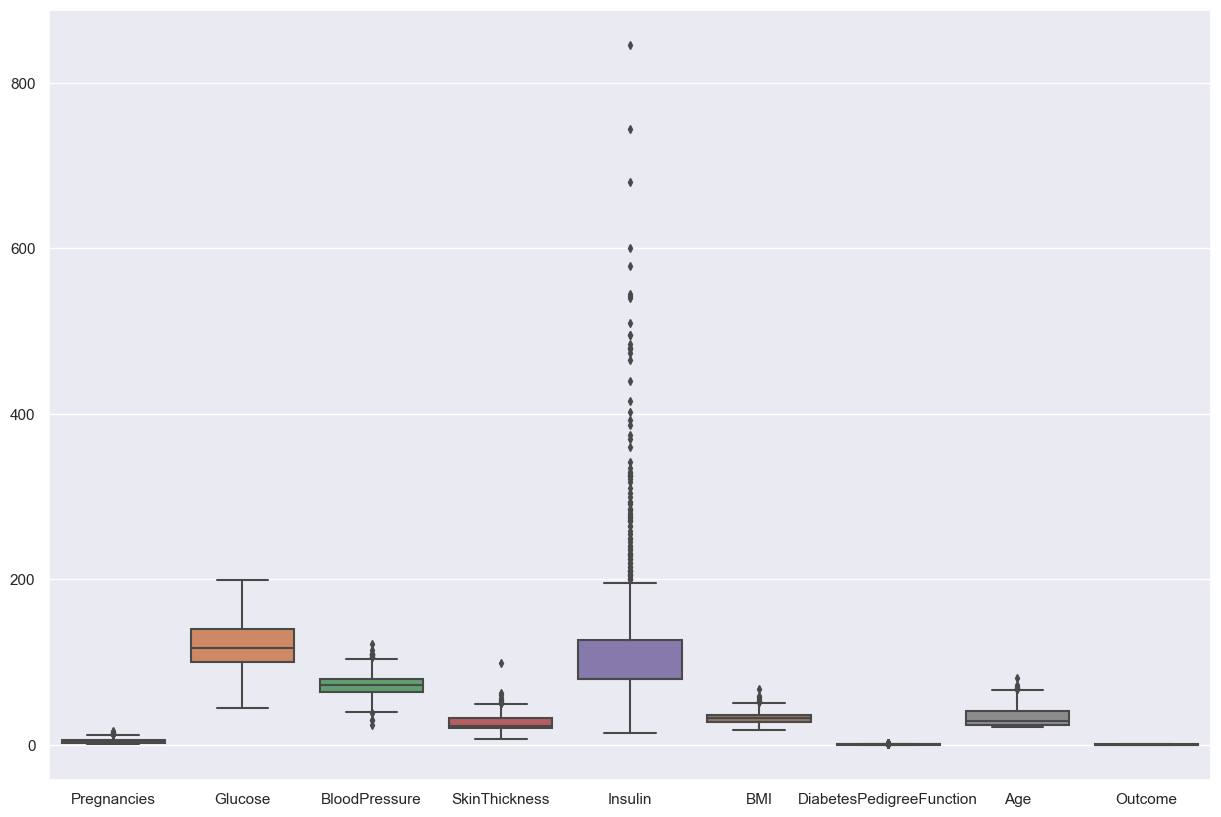

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(sugar, width = 0.8,fliersize = 4)

In [18]:
iqr = sugar['Pregnancies'].quantile(0.98) 
data_cleaned = sugar[sugar['Pregnancies']<iqr]

iqr = sugar['Glucose'].quantile(0.98) 
data_cleaned = sugar[sugar['Glucose']<iqr]

iqr = sugar['BloodPressure'].quantile(0.98) 
data_cleaned = sugar[sugar['BloodPressure']<iqr]

iqr = sugar['SkinThickness'].quantile(0.98) 
data_cleaned = sugar[sugar['SkinThickness']<iqr]

iqr = sugar['BMI'].quantile(0.98) 
data_cleaned = sugar[sugar['BMI']<iqr]

iqr = sugar['DiabetesPedigreeFunction'].quantile(0.98) 
data_cleaned = sugar[sugar['DiabetesPedigreeFunction']<iqr]

iqr = sugar['Age'].quantile(0.98) 
data_cleaned = sugar[sugar['Age']<iqr]

<function matplotlib.pyplot.show(close=None, block=None)>

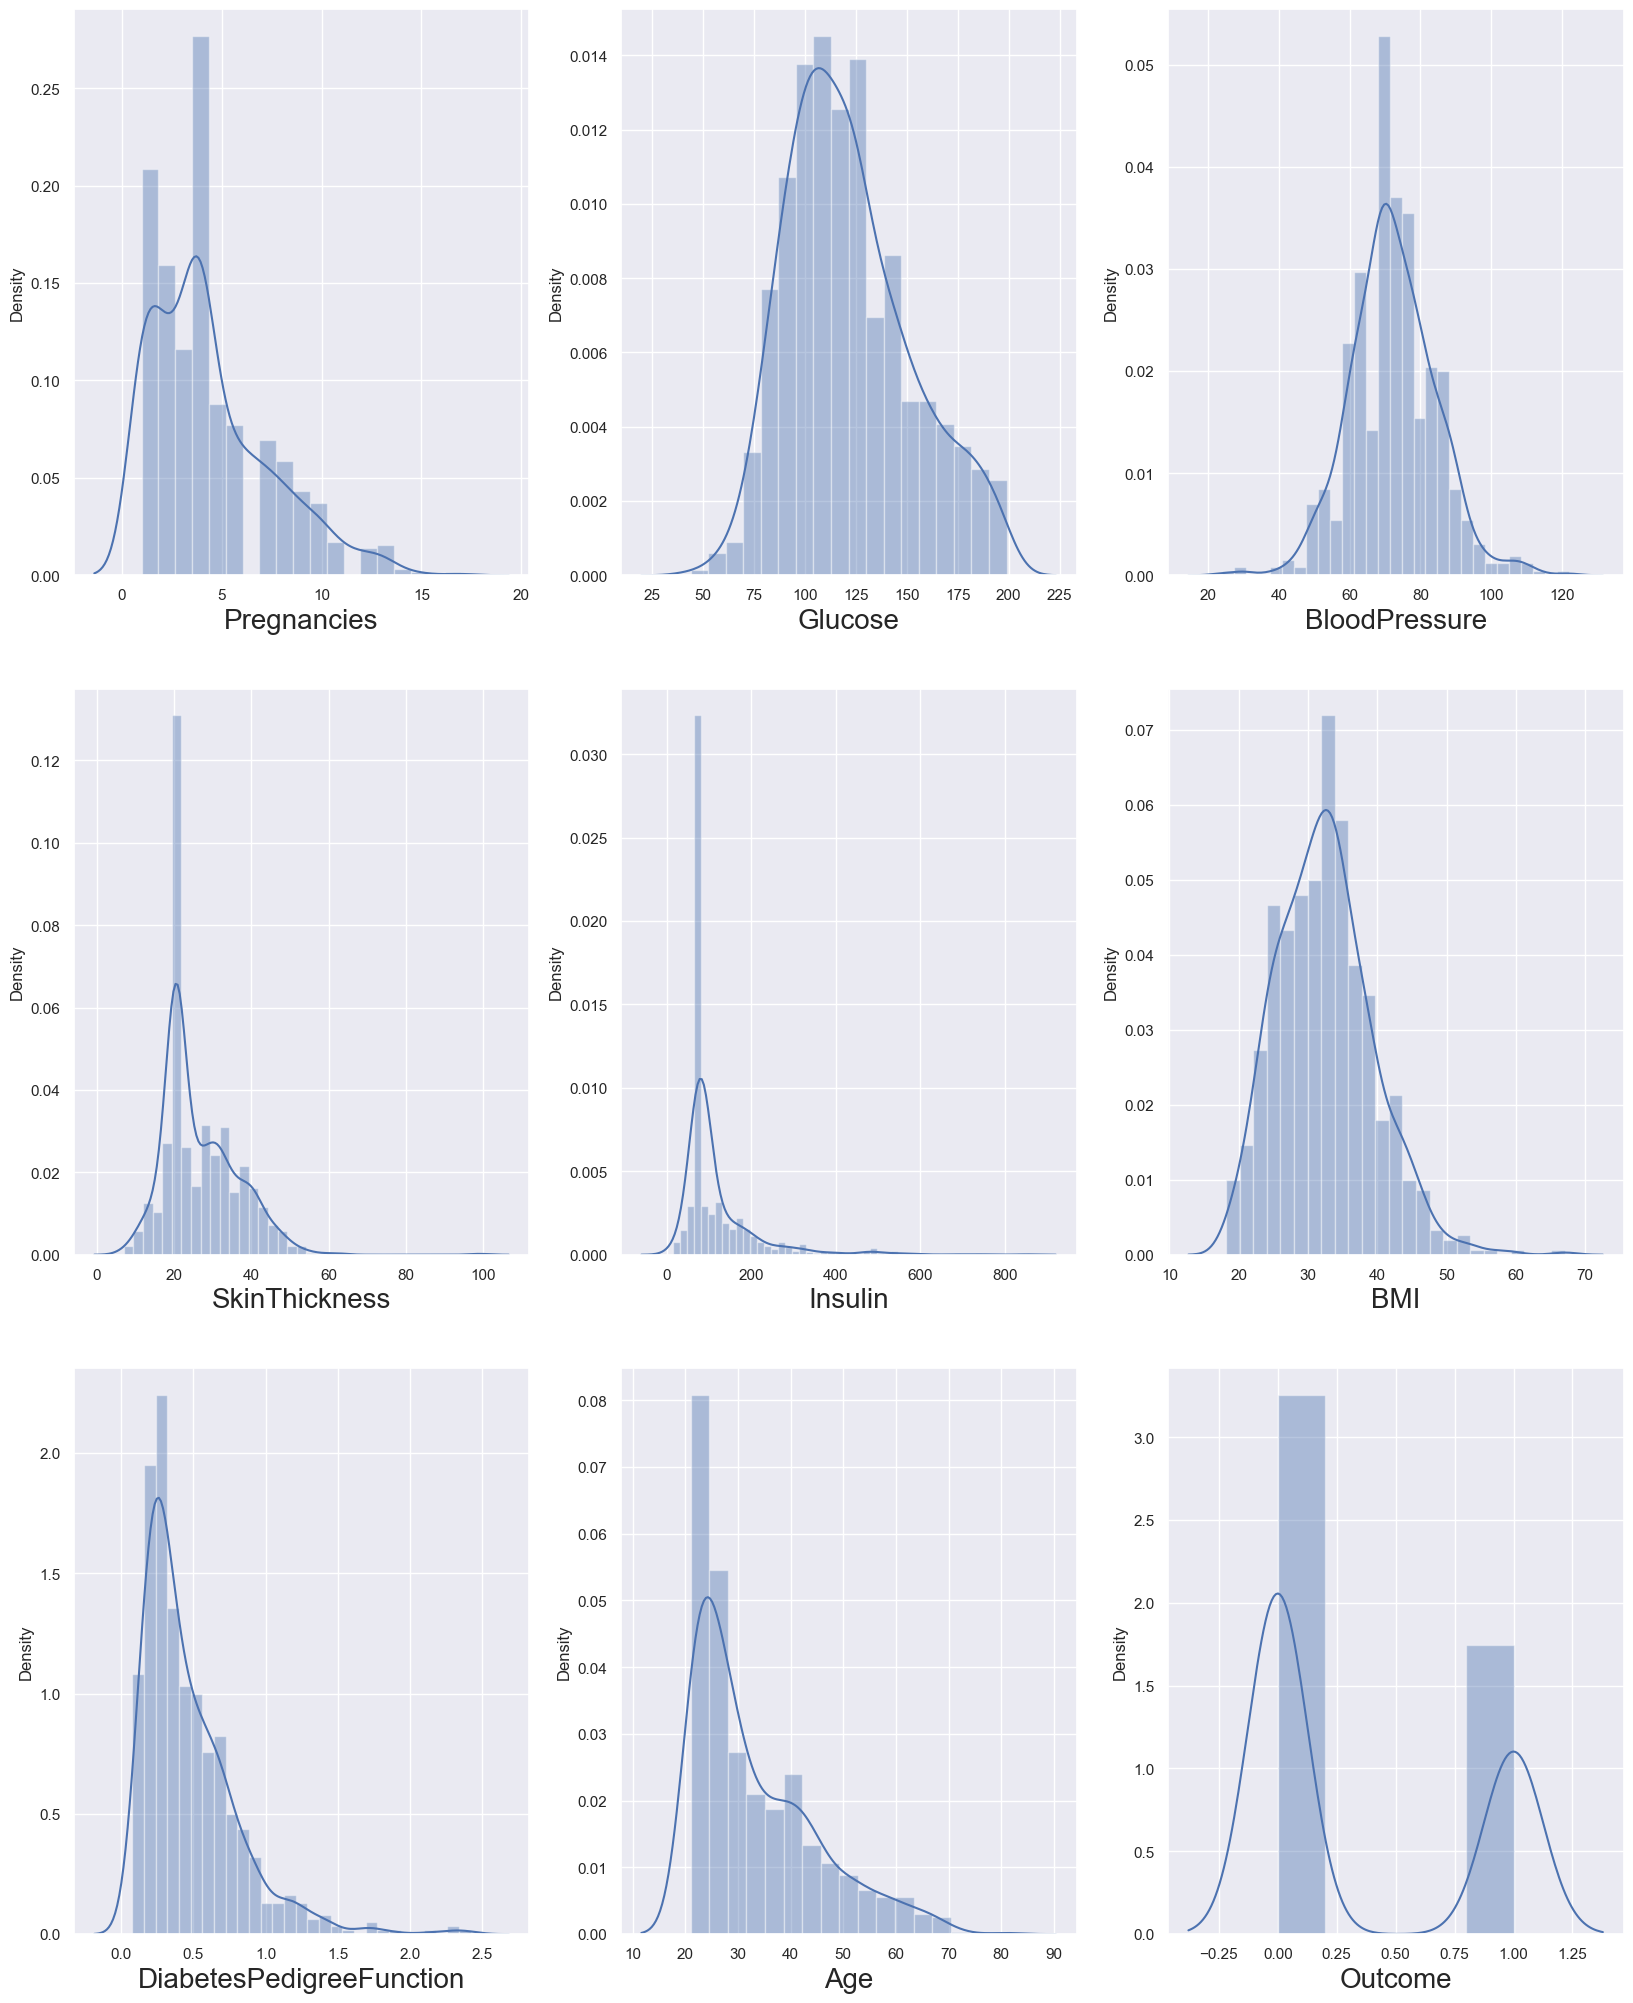

In [19]:
plt.figure(figsize=(20,25), facecolor='white')

plotnum = 1
for column in sugar:
    if plotnum<=9:
        ax = plt.subplot(3,3,plotnum)
        sns.distplot(sugar[column])
        plt.xlabel(column, fontsize = 20)
    plotnum +=1
plt.show

In [20]:
X = sugar.drop(columns = ['Outcome'])
y = sugar['Outcome']

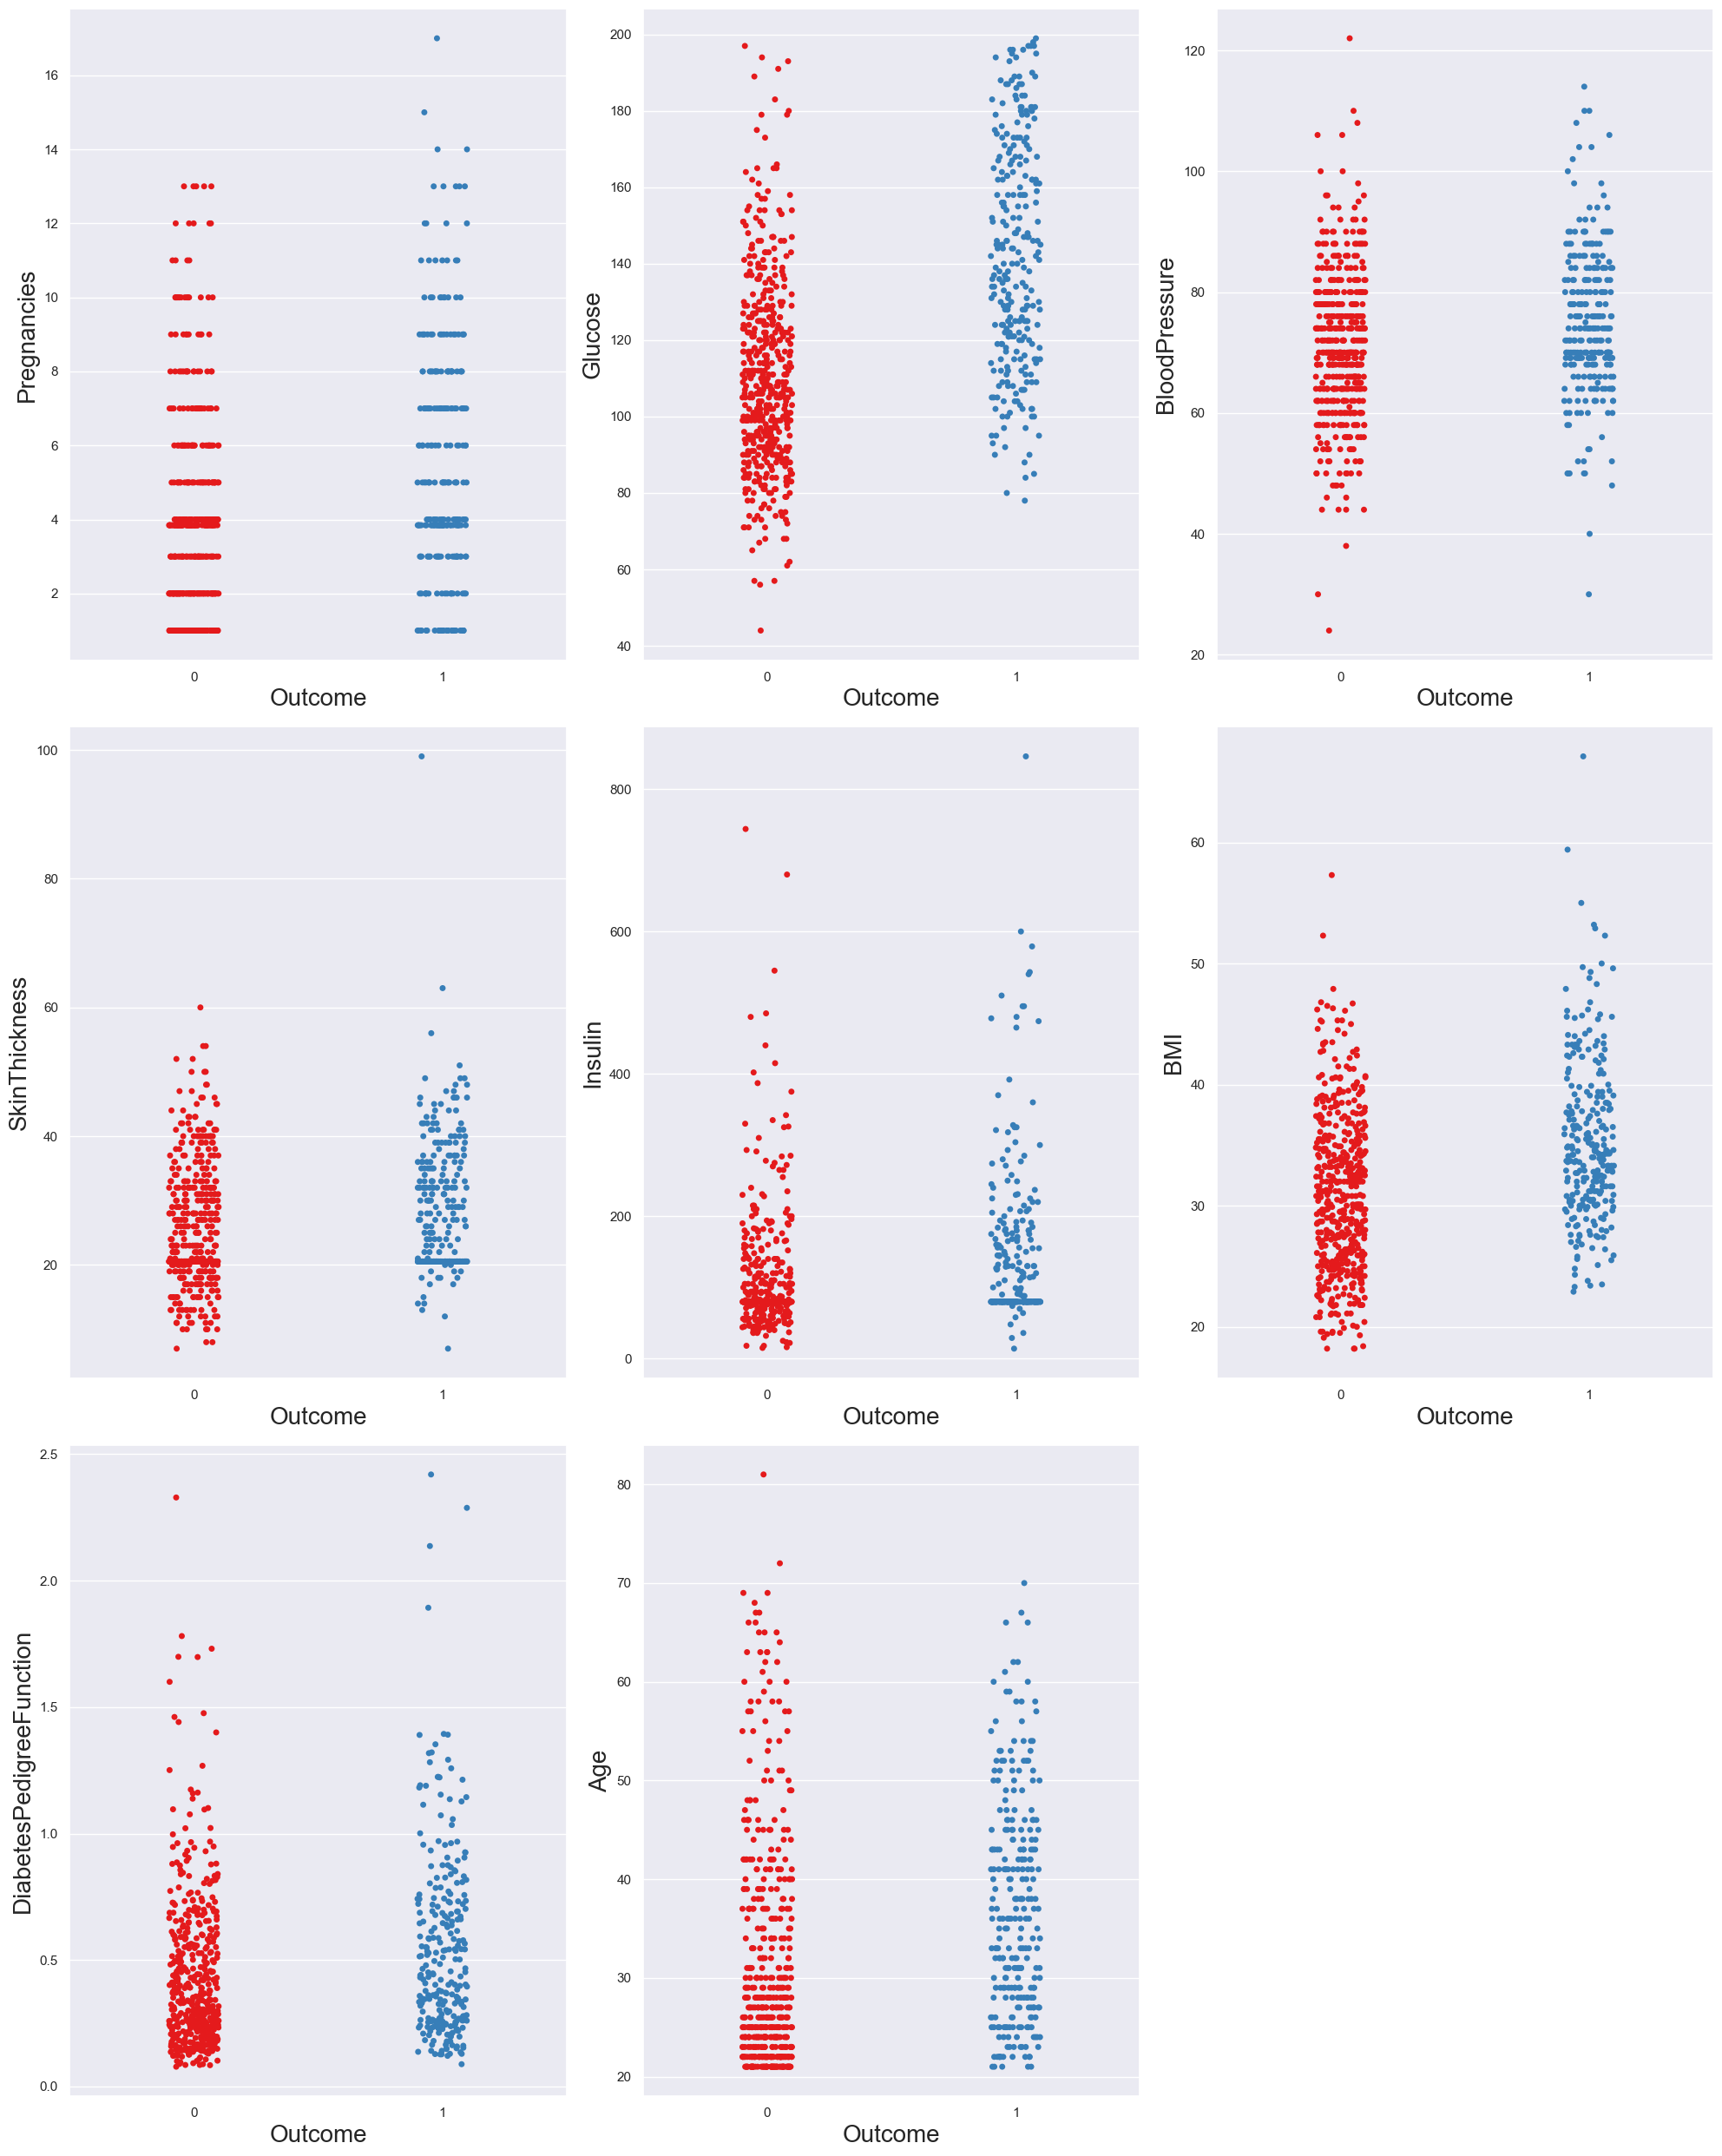

In [21]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1


for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=X[column], ax=ax, palette='Set1',)
        ax.set_xlabel('Outcome',fontsize=20)
        ax.set_ylabel(column, fontsize=20)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

## Independent and Dependent Variables

In [22]:
X = sugar[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

In [23]:
y = sugar['Outcome']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 355)

In [25]:
X_train.shape

(576, 8)

In [26]:
X_test.shape

(192, 8)

In [27]:
y_train.shape

(576,)

In [28]:
y_test.shape

(192,)

## Standardization of data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler

StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[-0.485855  , -1.37731339,  0.79755428, ...,  0.25946591,
         2.51242817, -0.52584624],
       [-1.17126046, -0.4945824 , -1.87519359, ..., -0.61336134,
        -0.88687715, -0.35423863],
       [ 1.91306412, -0.00417629, -0.37177291, ..., -0.18434456,
        -0.65128173,  0.67540705],
       ...,
       [-1.17126046,  0.55161729, -2.20928707, ..., -0.55418661,
         0.56035185, -0.95486528],
       [ 0.5422532 ,  0.81316722,  0.63050754, ..., -0.43583715,
        -0.89605619,  1.4476413 ],
       [-1.17126046,  0.12659867, -1.03995988, ..., -0.34707506,
        -0.37285078,  1.19022988]])

In [33]:
X_test

array([[ 0.5422532 , -0.16764499,  1.96688147, ..., -0.55418661,
        -0.96030949, -0.26843482],
       [-0.19625334,  0.61700477,  0.96460102, ..., -0.00682037,
        -0.1158376 , -0.95486528],
       [-0.14315227,  0.38814859, -0.03767943, ..., -1.27907705,
        -0.5931478 ,  2.30567937],
       ...,
       [ 0.19955047, -1.18115094, -0.37177291, ..., -0.33228138,
        -0.32695557, -0.78325766],
       [ 0.88495593,  1.85936691,  1.8833581 , ...,  0.25946591,
        -0.93889172,  2.30567937],
       [-0.82855773, -0.95229476, -0.7058664 , ...,  0.82162584,
         0.62154546, -0.86906147]])

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
import pickle
with open('prediction_model.sav', 'wb') as f:
    pickle.dump(log_reg,f)
with open('standard_scaler.sav', 'wb') as f:
    pickle.dump(scaler,f)

## Prediction

In [38]:
reg_pred = log_reg.predict(X_test)

In [39]:
reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

## Performance Metrics

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [127]:
# Assumption 1

accuracy_log_reg = accuracy_score(y_test, reg_pred) * 100
accuracy_log_reg

74.47916666666666

In [43]:
# Assumption 2 

conf_matrix = confusion_matrix(y_test, reg_pred)
conf_matrix

array([[108,  17],
       [ 32,  35]], dtype=int64)

In [44]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

In [45]:
true_positive, false_positive, false_negative, true_negative

(108, 17, 32, 35)

In [46]:
# Formula of Accuracy
Accuracy = (true_positive + true_negative) / (true_positive+false_positive+true_negative+false_negative)
Accuracy

0.7447916666666666

In [47]:
# Assumption 3

precision = true_positive / (true_positive+false_positive)
precision

0.864

In [48]:
# Assumption 4

recall = true_positive / (true_positive+false_negative)
recall

0.7714285714285715

In [49]:
# Assumption 5

f1_score = 2 * (recall * precision) / (recall + precision)
f1_score

0.8150943396226416

In [112]:
# Area under curve (AUC)
auc_log_reg = roc_auc_score(y_test, reg_pred)
auc_log_reg

0.6931940298507463

# Naive Bayes

In [64]:
# Lets first scale the Independent variables

In [65]:
scaler = StandardScaler()
scaler

StandardScaler()

In [66]:
X_scaled = scaler.fit_transform(X)

In [67]:
X_scaled

array([[ 0.5362511 ,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-1.1403533 , -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.20689286,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.20093022, -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-1.1403533 , -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [70]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [71]:
y_train.shape, y_test.shape

((576,), (192,))

In [76]:
import pickle
with open( 'naive_b_model.sav', 'wb') as f:
    pickle.dump(naive_b,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

Now, we will check for multicollinearity using VIF (Variance Inflation factor)

In [79]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.410013,Pregnancies
1,1.347415,Glucose
2,1.252549,BloodPressure
3,1.450493,SkinThickness
4,1.264171,Insulin
5,1.559203,BMI
6,1.056273,DiabetesPedigreeFunction
7,1.546208,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
naive_b = GaussianNB()

In [83]:
naive_b

GaussianNB()

In [84]:
naive_b.fit(X_train, y_train)

GaussianNB()

## Prediction

In [85]:
y_pred = naive_b.predict(X_test)

In [96]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

## Performance Metrics

In [97]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_test, y_pred) * 100

79.16666666666666

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[110,  15],
       [ 25,  42]], dtype=int64)

In [106]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

In [107]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7916666666666666

In [108]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [109]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8148148148148148

In [110]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8461538461538461

In [111]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7534328358208955

# Comparison AUC Score of Logistic Regression and Naive Bayes

If we compare AUC Score for Logistic Regression and Naive Bayes:

In [133]:
print("\nLogistic Regression AUC Score: ",auc_log_reg, "\nNaive Bayes AUC Score: ", auc)


Logistic Regression AUC Score:  0.6931940298507463 
Naive Bayes AUC Score:  0.7534328358208955


Here, we can see that the AUC score for Naïve Bayes > Logistic Regression.

So, we’ll take Naive Bayes as our production-ready model.

### Advantages and Disadvantages of Naive Bayes

#### Advantages:

- Naive Bayes is extremely fast for both training and prediction as they not have to learn to create separate classes.
- Naive Bayes provides a direct probabilistic prediction.
- Naive Bayes is often easy to interpret.
- Naive Bayes has fewer (if any) parameters to tune

#### Disadvantages:

- The algorithm assumes that the features are independent which is not always the scenario
- Zero Frequency i.e. if the category of any categorical variable is not seen in training data set even once then model assigns a zero probability to that category and then a prediction cannot be made.